<a href="https://colab.research.google.com/github/Blacklotus5/python3-cp2/blob/main/python_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

63.24555320336759


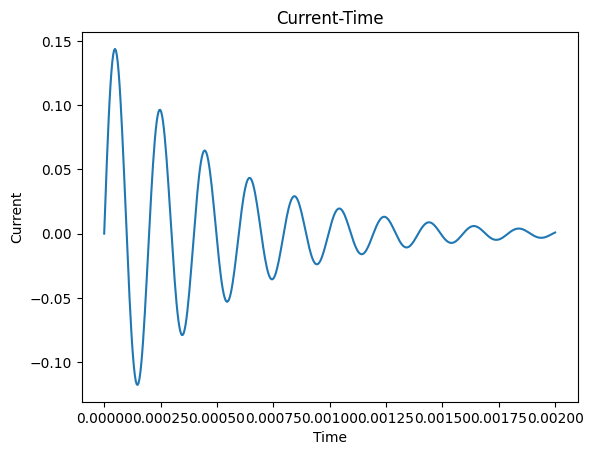

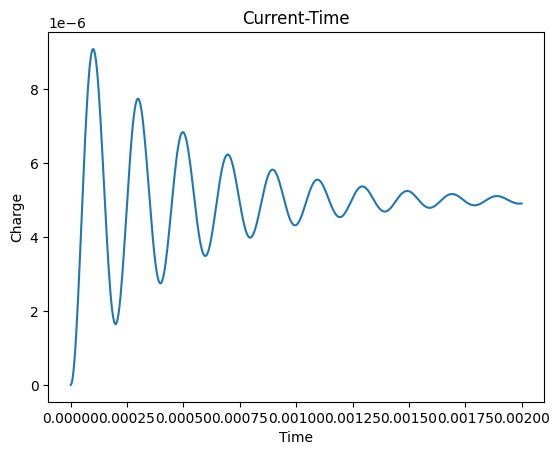

In [26]:
import numpy as np
import scipy as sp
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import math as m

# Case 1 : RLC Circuit - LC Oscillations, Damped, Underdamped, Overdamped

def lcr_eq(t,y,L,C,R,V):
	I, Q = y
	#V_t = V * np.sin(omega * t) #Sinusoidal
	dIdt = (V - R*I - Q / C) / L
	dQdt = I
	return [dIdt, dQdt]

def lcr_solve(L,C,R,V,t_span,y0):
	sol = solve_ivp(lcr_eq, t_span, y0, args=(L,C,R,V), dense_output=True)
	return sol

def plot_lcr(sol, t_eval):
  I,Q = sol.sol(t_eval)
  X = t_eval
  Y1,Y2 = I,Q
  fig1, ax = plt.subplots()
  ax.plot(X,Y1)
  ax.set_xlabel("Time")
  ax.set_ylabel("Current")
  ax.set_title('Current-Time')
  fig2, bx = plt.subplots()
  bx.plot(X,Y2)
  bx.set_xlabel("Time")
  bx.set_ylabel("Charge")
  bx.set_title('Current-Time')
  plt.show()

if __name__ == "__main__":
  L = 1e-3  # Inductance (1 mH)
  C = 1e-6  # Capacitance (1 μF)
  R = 2 * ((L / C)**0.5)    # Resistance (10 Ω)
  print(R)
  R = 4



  V = 5     # Voltage source (5 V)
  t_span = (0, 0.002) # Time span
  y0 = [0, 0]  # Initial conditions [I(0), Q(0)]

  sol = lcr_solve(L, C, R, V, t_span, y0)
  t_eval = np.linspace(t_span[0], t_span[1], 500)
  plot_lcr(sol, t_eval)


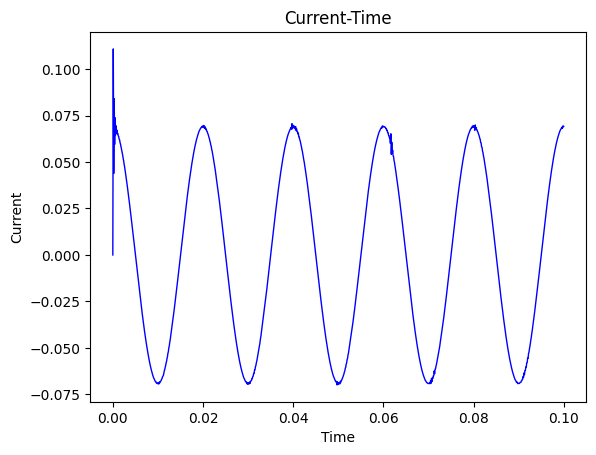

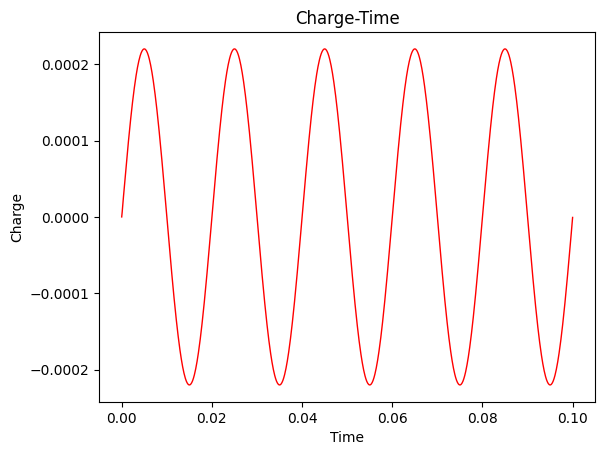

In [2]:
import numpy as np
import scipy as sp
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Case 2 : RLC Circuit Forced

def lcr_eq(t,y,L,C,R,V,omega):
	I, Q = y
	V_t = V * np.sin(omega * t) # Our Angular frequency
	dIdt = (V_t - R*I - Q / C) / L
	dQdt = I
	return [dIdt, dQdt]

def lcr_solve(L,C,R,V,omega,t_span,y0):
	sol = solve_ivp(lcr_eq, t_span, y0, args=(L,C,R,V,omega), dense_output=True)
	return sol

def plot_lcr(sol, t_eval,omega):
  I,Q = sol.sol(t_eval)
  X = t_eval
  Y1,Y2,Y3 = I,Q,I
  X3 = np.linspace(0, omega, 1000)

  # Current time graph
  fig1, ax = plt.subplots()
  ax.plot(X, Y1, color='blue', linewidth = 1)
  ax.set_xlabel("Time")
  ax.set_ylabel("Current")
  ax.set_title('Current-Time')

  # Charge time graph
  fig2, bx = plt.subplots()
  bx.plot(X, Y2, color='red', linewidth = 1)
  bx.set_xlabel("Time")
  bx.set_ylabel("Charge")
  bx.set_title('Charge-Time')

  # frequency analysis
  """fig3, cx = plt.subplots()
  cx.plot(X3, Y3, color='C2', linewidth = 1)
  cx.set_xlabel("Frequency")
  cx.set_ylabel("Current")
  cx.set_title('Current-Frequency')"""

  # Phasor analysis


if __name__ == "__main__":
  L = 1e-3  # Inductance (1 mH)
  C = 1e-6  # Capacitance (1 μF)
  R = 10    # Resistance (10 Ω)
  V = 220     # Voltage source (5 V)
  f = 50
  t_span = (0, 0.1)  # Time span
  y0 = [0, 0]  # Initial conditions [I(0), Q(0)]
  omega = 2*np.pi*f
  sol = lcr_solve(L, C, R, V,omega, t_span, y0)
  t_eval = np.linspace(t_span[0], t_span[1], 1000)
  plot_lcr(sol, t_eval,omega)


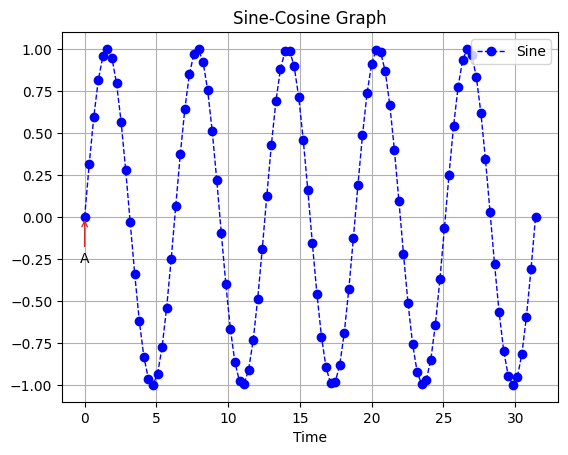

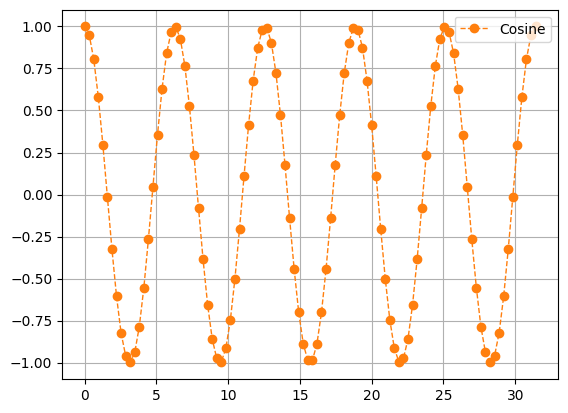

NameError: name 'fig' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(0, 10*np.pi, 100)
Y1,Y2 = np.sin(X), np.cos(X)
fig1, ax = plt.subplots()
ax.plot(X, Y1, color='blue', linewidth = 1, marker = 'o', linestyle = '--')
fig2, bx = plt.subplots()
bx.plot(X, Y2, color='C1', linewidth = 1, marker = 'o', linestyle = '--')

ax.set_xlabel('Time')
ax.set_ylabel(None)
ax.set_title('Sine-Cosine Graph')
ax.annotate('A', (0, 0), (0,-0.25), ha = 'center', va = 'center', arrowprops = {'arrowstyle': "->", 'color': 'C3'})
ax.legend(['Sine'], loc = 'upper right')
bx.legend(['Cosine'], loc = 'upper right')
ax.grid(True)
bx.grid(True)


plt.show()

fig.savefig("sin-cos.png", dpi = 300)